Importamos las librerias para empezar a trabajar.

In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud

Cargamos nuestro archivo unificado. 

In [59]:
restaurantes = pd.read_csv('EDA FINAL/Dataset-EDA/archivo_unificado.csv')

### LIMPIEZA DE DATOS

Revisamos las estructuras de los datos, que tipo de datos tenemos y si tenemos valores duplicados o nulos.

In [60]:
restaurantes.head(3)

,id_servicios_restaurantes,servicios_restaurantes,direccion,id_condado,condado,codigo_postal_condado,latitud_condado,longitud_condado,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,estado,categorias,puntuacion_usuarios,analisis_sentimientos,url_del_negocio,enlaces_google_maps,anio
0,05HTY,ruby tuesday,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.503323,-81.458029,Florida,"['American restaurant', 'Bar', 'European resta...",3.88,NaN,NaN,NaN,2023
1,R252A,denny's,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.502807,-81.458022,Florida,"['Diner', 'American restaurant', 'Breakfast re...",3.85,NaN,NaN,NaN,2023
2,U8STH,el puerto argentinean grill,"North 17th Street, Ybor City",uHNL,Hillsborough,"33602, 33647, 33511",27.990360,-82.301773,w2w7,brandon,33605,27.958677,-82.440585,Florida,Otros,4.00,NaN,NaN,NaN,2023


In [61]:
restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  70391 non-null  object 
 1   servicios_restaurantes     70391 non-null  object 
 2   direccion                  70391 non-null  object 
 3   id_condado                 70391 non-null  object 
 4   condado                    70391 non-null  object 
 5   codigo_postal_condado      70391 non-null  object 
 6   latitud_condado            70391 non-null  float64
 7   longitud_condado           70391 non-null  float64
 8   id_ciudad                  70391 non-null  object 
 9   ciudad                     70391 non-null  object 
 10  codigo_postal_ciudad       70391 non-null  object 
 11  latitud_ciudad             70391 non-null  float64
 12  longitud_ciudad            70391 non-null  float64
 13  estado                     70391 non-null  obj

In [62]:
restaurantes.isnull().sum()

id_servicios_restaurantes        0
servicios_restaurantes           0
direccion                        0
id_condado                       0
condado                          0
codigo_postal_condado            0
latitud_condado                  0
longitud_condado                 0
id_ciudad                        0
ciudad                           0
codigo_postal_ciudad             0
latitud_ciudad                   0
longitud_ciudad                  0
estado                           0
categorias                       0
puntuacion_usuarios              0
analisis_sentimientos         9139
url_del_negocio              70391
enlaces_google_maps          70391
anio                             0
dtype: int64

In [63]:
duplicados = restaurantes[restaurantes.duplicated(keep=False)]
indices_duplicados = duplicados.index
print(indices_duplicados)

Index([], dtype='int64')


Las columnas con valores nulos no van a ser utilizadas por lo que las eliminamos junto con las otras columnas que no serán utilizadas.

In [64]:
restaurantes.drop(columns=['id_servicios_restaurantes',
                           'direccion',
                           'id_condado',
                           'codigo_postal_condado',
                           'id_ciudad',
                           'codigo_postal_ciudad',
                           'latitud_ciudad',
                           'longitud_ciudad',
                           'estado', 
                           'analisis_sentimientos', 
                           'url_del_negocio', 
                           'enlaces_google_maps'], inplace=True)

In [65]:
restaurantes.head(2) #revisamos que se hayan eliminado las columnas

,servicios_restaurantes,condado,latitud_condado,longitud_condado,ciudad,categorias,puntuacion_usuarios,anio
0,ruby tuesday,Orange,28.484499,-81.251883,apopka,"['American restaurant', 'Bar', 'European resta...",3.88,2023
1,denny's,Orange,28.484499,-81.251883,apopka,"['Diner', 'American restaurant', 'Breakfast re...",3.85,2023


In [66]:
restaurantes.rename(columns={'servicios_restaurantes': 'nombre'}, inplace=True) #cambiamos a nombre en vez de servicios_restaurantes

Para nuestro análisis necesitaremos las categorías de nuestros restaurantes. La idea es agrupar las distintas subcategorias en categorias principales. Primero limpiaremos las categorias que tienen este formato: [' ']

In [67]:
restaurantes['categorias'] = restaurantes['categorias'].str.replace(r'\s+', ' ', regex=True)
restaurantes['categorias'] = restaurantes['categorias'].str.strip("[]").str.replace("'", "", regex=False)

In [68]:
restaurantes.head(5) #Revisamos si se limpio correctamente

,nombre,condado,latitud_condado,longitud_condado,ciudad,categorias,puntuacion_usuarios,anio
0,ruby tuesday,Orange,28.484499,-81.251883,apopka,"American restaurant, Bar, European restaurant,...",3.88,2023
1,denny's,Orange,28.484499,-81.251883,apopka,"Diner, American restaurant, Breakfast restaurant",3.85,2023
2,el puerto argentinean grill,Hillsborough,27.990360,-82.301773,brandon,Otros,4.00,2023
3,la terrazza restaurant,Hillsborough,27.990360,-82.301773,brandon,Otros,4.00,2023
4,the country club of florida,Palm Beach,26.651450,-80.276733,west palm beach,Otros,1.00,2023


Vemos que en algunas filas de la categoria columna se ven en formato de lista, sin embargo, este no es caso por lo que las pasasmos a listas. 

In [69]:
for indice, columna in restaurantes.iterrows(): # las pasamos a listas.
    categorias = columna['categorias']
    
    if isinstance(categorias, str):
        categorias = categorias.split(',') 
        categorias = [categoria.strip() for categoria in categorias]  


Una vez que ya tenemos las categorias en formato lista, vamos a identificar cuales son las categorias que estan actualmente para poder tomar la principal de cada fila y agruparlas en un nuevo grupo de categorias generales.

In [70]:
categorias_a_buscar = ['Spanish', 'Italian', 'Japanese', 'Vegetarian', 'Chinese','Mexican','Seafood','Chicken Wings','Thai','Vietnamese',
                       'Greek','Filipino','Peruvian','Korean','Halal','German','Fast Food','Scottish','Indian','French','Vegan',
                       'Cuban','Brazilian','Bakeries','Mediterranean','Bars','Pizza','Buffets','Barbeque','Steakhouses',
                       'Wine & Spirits','Asian Fusion','Bagels','Coffee & Tea','Delis','Caribbean','Cafes','Soul Food','Salad','Diners',
                       'Middle Eastern','Donuts','Hot Dogs','barber shop','pizza restaurant',' seafood restaurant','puerto rican restaurant','italian restaurant','bar',
                       'cuban restaurant','american restaurant','sandwich shop','taco restaurant','colombian restaurant','modern french restaurant','bar stool supplier',
                       'health markets','chinese restaurant','fast food restaurant','mediterranean restaurant','mexican restaurant','asian fusion restaurant','juice bars & smoothies',
                       'american (new)','sandwiches','breakfast & brunch','hookah bar','pizza delivery','southern restaurant (us)','latin american','venezuelan',
                       'american (traditional)','waffles','hair salons','association or organization','eyebrow bar','food trucks','burgers',
                       'arts & entertainment', 'cinema', 'dinner theater', 'restaurants', 'nightlife', 'comedy clubs',
                       'adult entertainment club', 'cocktail bar', 'night club','beauty & spas', 'barbers','health & medical', 'oxygen bars', 'iv hydration',
                       'active life', 'cardio classes', 'womens clothing', 'fashion', 'shopping', 'fitness & instruction','cafe','wine store', 'wine bar',
                       'chicken wings restaurant','video arcade', 'event venue', 'sports bar','caribbean restaurant', 'soul food restaurant','event planning & services', 
                       'caterers', 'bartenders','kiosk','bar & grill','korean barbecue restaurant', 'japanese restaurant', 'korean restaurant', 'sushi restaurant','restaurant',
                       'breakfast restaurant', 'deli','jamaican restaurant','vietnamese restaurant','delivery restaurant','liquor store','hot dog restaurant','family restaurant',
                       'middle eastern restaurant','health food restaurant','latin american restaurant','thai restaurant','gay bar','indian restaurant',
                       'barbecue restaurant','dominican restaurant','asian restaurant','honduran restaurant','tapas bar','authentic japanese restaurant','cheesesteak restaurant','bartending school','spanish restaurant','pan-latin restaurant','peruvian restaurant','grill store',
                       'business center','argentinian restaurant','chicken restaurant','takeout restaurant','hamburger restaurant','internet cafe','hawaiian restaurant','venezuelan restaurant',
                       'cafeteria','tex-mex restaurant','brazilian restaurant','beauty supply store','nuevo latino restaurant','bistro','french restaurant','restaurant supply store',
                       'greek restaurant','barber supply store','buffet restaurant','art cafe','vegan restaurant','kosher restaurant','hot pot restaurant','haitian restaurant',
                       'guatemalan restaurant','brunch restaurant','salvadoran restaurant','portuguese restaurant','georgian restaurant','halal restaurant','new american restaurant',
                       'persian restaurant','coffee shop','nicaraguan restaurant','european restaurant','indonesian restaurant','filipino restaurant','dessert restaurant',
                       'israeli restaurant','landscaping supply store','down home cooking restaurant','chophouse restaurant','pizza takeout','lunch restaurant','espresso bar',
                       'piano bar','cajun restaurant','tapas restaurant','country food restaurant','german restaurant','ramen restaurant','fusion restaurant','vegetarian restaurant','store'
                       ,'car dealer','irish restaurant','armenian restaurant','traditional american restaurant','snack bar','northern italian restaurant','barber school',
                       'caterer','cape verdean restaurant','baby clothing store','oyster bar restaurant','attorney','party planner','fine dining restaurant','ethiopian restaurant',
                       'lebanese restaurant','entertainment agency','west african restaurant','auto repair shop','otros'] #categorias principales

restaurantes['categorias'] = restaurantes['categorias'].apply(lambda x: [item.strip() for item in x.split(',')] if isinstance(x, str) else x)
categorias_a_buscar = [categoria.lower().strip() for categoria in categorias_a_buscar]

categorias_encontradas = {categoria: 0 for categoria in categorias_a_buscar}

categoria_sin_coincidencia = 0
indice_categoria_sin_coincidencia = []

restaurantes['categorias'] = restaurantes['categorias'].apply(lambda x: eval(x) if isinstance(x, str) else x)

restaurantes['categorias'] = restaurantes['categorias'].apply(lambda x: [categoria.lower().strip() for categoria in x])

for indice, columna in restaurantes.iterrows():
    categorias = columna['categorias']  
    
    encontrada = False
    
    for categoria in categorias_a_buscar:
        if categoria in categorias:
            categorias_encontradas[categoria] += 1  
            encontrada = True  
    
    if not encontrada:
        categoria_sin_coincidencia += 1
        indice_categoria_sin_coincidencia.append(index)


print("Categorias encontradas:")
print(categorias_encontradas)
print("Índices filas sin ninguna de las categorías buscadas:", categoria_sin_coincidencia)


Categorias encontradas:
{'spanish': 715, 'italian': 3497, 'japanese': 1635, 'vegetarian': 818, 'chinese': 1907, 'mexican': 2532, 'seafood': 4897, 'chicken wings': 1689, 'thai': 1454, 'vietnamese': 672, 'greek': 1203, 'filipino': 91, 'peruvian': 147, 'korean': 250, 'halal': 222, 'german': 197, 'fast food': 1322, 'scottish': 3, 'indian': 501, 'french': 281, 'vegan': 710, 'cuban': 1294, 'brazilian': 92, 'bakeries': 1251, 'mediterranean': 1013, 'bars': 11167, 'pizza': 4407, 'buffets': 517, 'barbeque': 1379, 'steakhouses': 1676, 'wine & spirits': 1639, 'asian fusion': 1388, 'bagels': 346, 'coffee & tea': 2447, 'delis': 1677, 'caribbean': 938, 'cafes': 2766, 'soul food': 245, 'salad': 2525, 'diners': 1177, 'middle eastern': 422, 'donuts': 218, 'hot dogs': 555, 'barber shop': 3317, 'pizza restaurant': 1807, 'seafood restaurant': 1469, 'puerto rican restaurant': 75, 'italian restaurant': 921, 'bar': 2028, 'cuban restaurant': 310, 'american restaurant': 3086, 'sandwich shop': 1533, 'taco restau

Ya una vez tenemos las categorías, se crea el diccionario de categorias_generales con el fin de hacer un análisis de las categorias sin utilizar las mas de 600 categorias principales, sino las 16 categorías generales. 

In [71]:
categorias_generales = {
    'Cocina Europea': ['spanish', 'italian', 'greek', 'german', 'scottish', 'french', 'mediterranean', 'middle eastern', 
                       'italian restaurant', 'modern french restaurant', 'mediterranean restaurant', 'middle eastern restaurant',
                       'european restaurant', 'german restaurant', 'northern italian restaurant', 'spanish restaurant',
                       'french restaurant', 'greek restaurant', 'portuguese restaurant', 'georgian restaurant', 'persian restaurant'], 
    'Cocina Asiática': ['fusion restaurant', 'ramen restaurant', 'japanese', 'chinese', 'thai', 'vietnamese', 'filipino', 'korean', 
                        'indian', 'asian fusion', 'chinese restaurant', 'asian fusion restaurant', 'korean barbecue restaurant', 
                        'japanese restaurant', 'indonesian restaurant', 'filipino restaurant', 'korean restaurant', 'sushi restaurant', 
                        'vietnamese restaurant', 'thai restaurant', 'indian restaurant', 'asian restaurant', 'authentic japanese restaurant', 
                        'chophouse restaurant'],
    'Comida Vegetariana': ['vegetarian restaurant', 'vegetarian', 'vegan', 'salad', 'vegan restaurant'],
    'Cocina Caribeña y Latina': ['mexican', 'peruvian', 'cuban', 'caribbean', 'puerto rican restaurant', 'cuban restaurant', 'mexican restaurant',
                                 'latin american', 'caribbean restaurant', 'nicaraguan restaurant', 'armenian restaurant', 'latin american restaurant',
                                 'dominican restaurant', 'honduran restaurant', 'pan-latin restaurant', 'peruvian restaurant', 'tex-mex restaurant', 
                                 'brazilian restaurant', 'nuevo latino restaurant', 'guatemalan restaurant', 'salvadoran restaurant'],
    'Cocina Suramericana': ['brazilian', 'colombian restaurant', 'venezuelan', 'argentinian restaurant', 'venezuelan restaurant'],
    'Comida de mar': ['seafood', 'seafood restaurant'],
    'Cocina Africana': ['west african restaurant'],
    'Comida americana': ['traditional american restaurant', 'chicken wings', 'american restaurant', 'american (new)', 'southern restaurant (us)', 
                         'american (traditional)', 'chicken wings restaurant', 'country food restaurant', 'chicken restaurant', 'hawaiian restaurant', 
                         'new american restaurant'],
    'Comida especializada': ['irish restaurant', 'halal', 'soul food', 'health markets', 'soul food restaurant', 'jamaican restaurant', 
                             'health food restaurant', 'ethiopian restaurant', 'cape verdean restaurant', 'cajun restaurant', 'israeli restaurant', 
                             'lebanese restaurant', 'kosher restaurant', 'hot pot restaurant', 'haitian restaurant', 'halal restaurant'],
    'Comida rápida': ['fast food', 'pizza', 'diners', 'fast food', 'hot dogs', 'pizza restaurant', 'sandwich shop', 'taco restaurant', 
                      'fast food restaurant', 'sandwiches', 'pizza delivery', 'food trucks', 'burgers', 'delivery restaurant', 'hot dog restaurant', 
                      'cheesesteak restaurant', 'takeout restaurant', 'hamburger restaurant', 'pizza takeout'],
    'Postres, Snacks y cafeterias': ['snack bar', 'tapas restaurant', 'espresso bar', 'dessert restaurant', 'bakeries', 'bagels', 'coffe & tea', 
                                     'cafes', 'donuts', 'juice bars & smoothies', 'waffles', 'cafe', 'deli', 'tapas bar', 'internet cafe', 'cafeteria', 
                                     'bistro', 'art cafe', 'coffee shop'],
    'Bares y Vida Nocturna': ['piano bar', 'bars', 'bar', 'bar stool supplier', 'hookah bar', 'nightlife', 'comedy clubs', 'adult entertainment club', 
                              'cocktail bar', 'night club', 'wine store', 'wine bar', 'video arcade', 'sports bar', 'bartenders', 'liquor store', 'gay bar', 
                              'bartending school', 'oyster bar restaurant'],
    'Parrilladas y Carnes': ['steakhouses', 'barbeque', 'bar & grill', 'barbecue restaurant', 'grill store'],
    'Eventos': ['buffetts', 'wine & spirits', 'delis', 'breakfast & brunch', 'event venue', 'event planning & services', 'caterers', 'breakfast restaurant', 
                'party planner', 'fine dining restaurant', 'buffet restaurant', 'brunch restaurant', 'lunch restaurant', 'caterer'],
    'Restaurantes y servicios': ['barber shop', 'auto repair shop', 'hair salons', 'association or organization', 'eyebrow bar', 'arts & entertainment', 
                                 'cinema', 'dinner theater', 'restaurants', 'beauty & spas', 'barbers', 'health & medical', 'oxygen bars', 'iv hydration', 
                                 'active life', 'cardio classes', 'womens clothing', 'fashion', 'shopping', 'fitness & instruction', 'kiosk', 'restaurant', 
                                 'family restaurant', 'entertainment agency', 'attorney', 'baby clothing store', 'business center', 'beauty supply store', 
                                 'restaurant supply store', 'barber supply store', 'landscaping supply store', 'down home cooking restaurant', 'store', 
                                 'car dealer', 'barber school'],
    'Otros': ['otros']
}

Una vez creado nuestro diccionario, creamos una función para recorrer las listas de cada fila en nuestra columna de categorias con el fin de clasificarlas en las categorias generales, para agregarlas creamos una nueva columna.

In [72]:
def categorizar(columna, categorias_generales):
    for categoria, palabras in categorias_generales.items():
        if any(palabra.lower() in item.lower() for item in columna['categorias'] for palabra in palabras):
            return categoria
    return 'Otros'

restaurantes['categoria_general'] = restaurantes.apply(categorizar, axis=1, categorias_generales=categorias_generales)


In [73]:
restaurantes.head(10) #revisamos que se hayan dado los cambios

,nombre,condado,latitud_condado,longitud_condado,ciudad,categorias,puntuacion_usuarios,anio,categoria_general
0,ruby tuesday,Orange,28.484499,-81.251883,apopka,"[american restaurant, bar, european restaurant...",3.88,2023,Cocina Europea
1,denny's,Orange,28.484499,-81.251883,apopka,"[diner, american restaurant, breakfast restaur...",3.85,2023,Comida americana
2,el puerto argentinean grill,Hillsborough,27.990360,-82.301773,brandon,[otros],4.00,2023,Otros
3,la terrazza restaurant,Hillsborough,27.990360,-82.301773,brandon,[otros],4.00,2023,Otros
4,the country club of florida,Palm Beach,26.651450,-80.276733,west palm beach,[otros],1.00,2023,Otros
5,east colonial drive,Orange,28.484499,-81.251883,apopka,[otros],3.00,2023,Otros
6,hooters,Orange,28.484499,-81.251883,apopka,"[sports bar, american restaurant, bar & grill,...",4.00,2023,Comida de mar
7,rick's on the river,Hillsborough,27.990360,-82.301773,brandon,"[restaurants, music venues, american (new), ni...",3.00,2023,Comida americana
8,spain restaurant & toma bar,Hillsborough,27.990360,-82.301773,brandon,"[basque, tapas bars, spanish, restaurants]",4.00,2023,Cocina Europea
9,pizza hut,Hillsborough,27.990360,-82.301773,brandon,"[pizza delivery, chicken wings restaurant, piz...",3.46,2023,Comida americana


### ANÁLISIS 

A continuación veremos la media,mediana, desviación estadar, cuartiles y visualizaremos los datos atipicos a traves de un boxplot de las puntuaciones dadas por los usuarios. Para ello veremos los valores anuales de cada una. 

In [74]:
medidas_por_años = restaurantes.groupby('anio')['puntuacion_usuarios'] #agrupamos por año y puntuación de usuarios

In [75]:
media_por_año = medidas_por_años.mean() # Sacamos la media y usamos tail para observar los últimos 5 años
media_por_año.tail(5)

anio
2020    3.951732
2021    3.970194
2022    3.992672
2023    3.350061
2024    4.079685
Name: puntuacion_usuarios, dtype: float64

In [76]:
mediana_por_año = medidas_por_años.median() #sacamos la mediana
mediana_por_año.tail(5)

anio
2020    4.00
2021    4.00
2022    4.00
2023    3.85
2024    4.30
Name: puntuacion_usuarios, dtype: float64

In [77]:
desviacion_por_año = medidas_por_años.std() # sacamos la desviación estandar de los últimos años. 
desviacion_por_año.tail(5)

anio
2020    0.605201
2021    0.611963
2022    0.591281
2023    1.231713
2024    0.815477
Name: puntuacion_usuarios, dtype: float64

De acuerdo a lo mostrado en las desviaciones estandar de los últimos 5 años, podemos concluir que a medida que pasan los años los datos van siendo mas dispersos. 

In [78]:
percentil_25_por_año = medidas_por_años.quantile(0.25)
percentil_25_por_año.tail(5)

anio
2020    3.5
2021    3.5
2022    3.5
2023    3.0
2024    3.9
Name: puntuacion_usuarios, dtype: float64

In [79]:
percentil_50_por_año = medidas_por_años.quantile(0.50)
percentil_50_por_año.tail(5)

anio
2020    4.00
2021    4.00
2022    4.00
2023    3.85
2024    4.30
Name: puntuacion_usuarios, dtype: float64

In [80]:
percentil_75_por_año = medidas_por_años.quantile(0.75)
percentil_75_por_año.tail(5)

anio
2020    4.50
2021    4.50
2022    4.50
2023    4.16
2024    4.60
Name: puntuacion_usuarios, dtype: float64

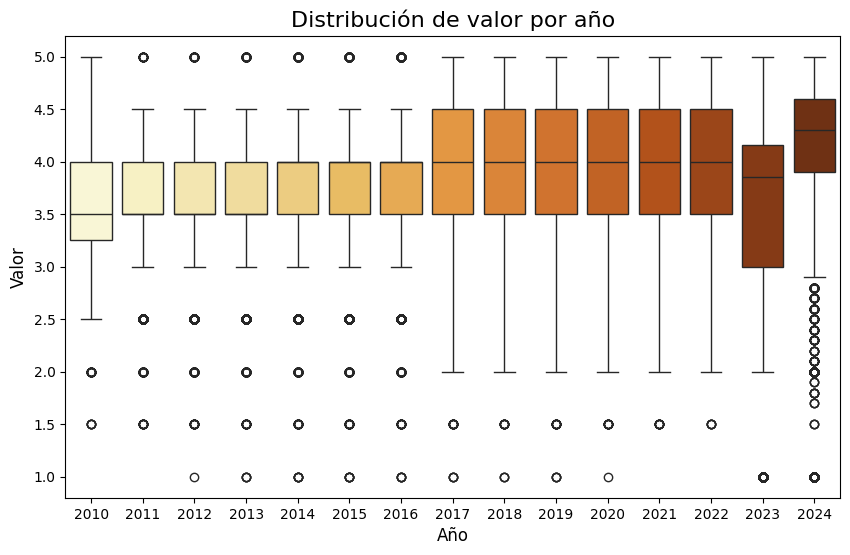

In [81]:
paleta_colores = sns.color_palette("YlOrBr", n_colors=len(restaurantes['anio'].unique()))
restaurantes['color'] = restaurantes['anio'].map(lambda x: paleta_colores[restaurantes['anio'].unique().tolist().index(x) % len(paleta_colores)])

plt.figure(figsize=(10, 6))
sns.boxplot(x='anio', y='puntuacion_usuarios', data=restaurantes, hue='anio', palette=paleta_colores)
plt.title('Distribución de valor por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend([], [], frameon=False) 
plt.show()

Conclusión: teniendo en encuentra el boxplot anterior y los datos estadisticos análizados, nos damos cuenta que a medida que avanzan los años la media de calificaciones va subiendo de manera positiva, demostrando que la calidad de los distintos restaurantes va mejorando año a año, conviertiendo las puntuaciones no tan favorables como por ejemplos las puntuadas por debajo de 3 en valores a tipicos, como se puede observar en el 2024. Casi podría decirse que hay una relación entre las puntuaciones y el tiempo, para ello haremos un matriz de correlación para verificarlo. 

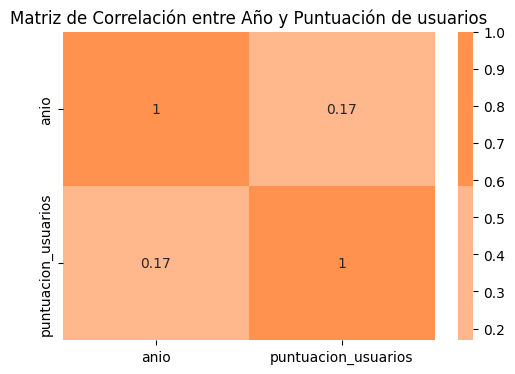

In [82]:
correlacion = restaurantes[['anio', 'puntuacion_usuarios']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap=sns.color_palette(["#FFB78B", "#ff924e"], as_cmap=True))
plt.title('Matriz de Correlación entre Año y Puntuación de usuarios')
plt.show()

Como conclusión final podemos decir que si bien existe una pequeña correlación, esta es muy débil, por lo que no se puede decir con exactitud si una influye sobre la otra. 

Ahora pasaremos a ver las categorias, para ello usaremos una nube de palabras con el fin de ver cual de nuestras categorias generales es la que mas se repite y nos de una idea cuales son las mas usadas por los comercios. 

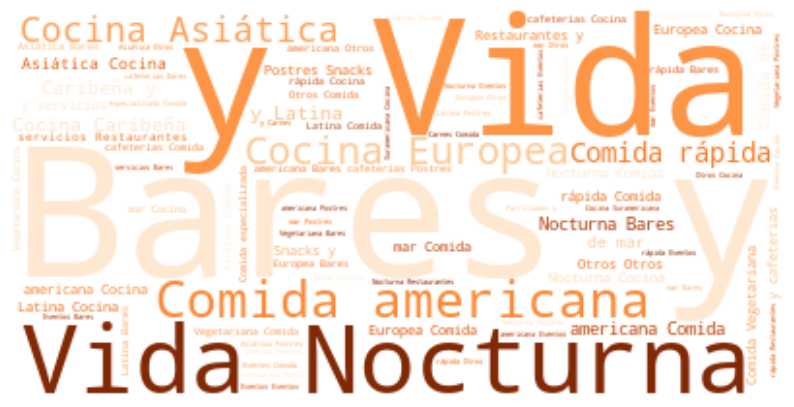

In [83]:
texto_completo = ' '.join(restaurantes['categoria_general'].dropna())
wordcloud = WordCloud(max_words=1000, background_color='white',colormap= 'Oranges').generate(texto_completo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

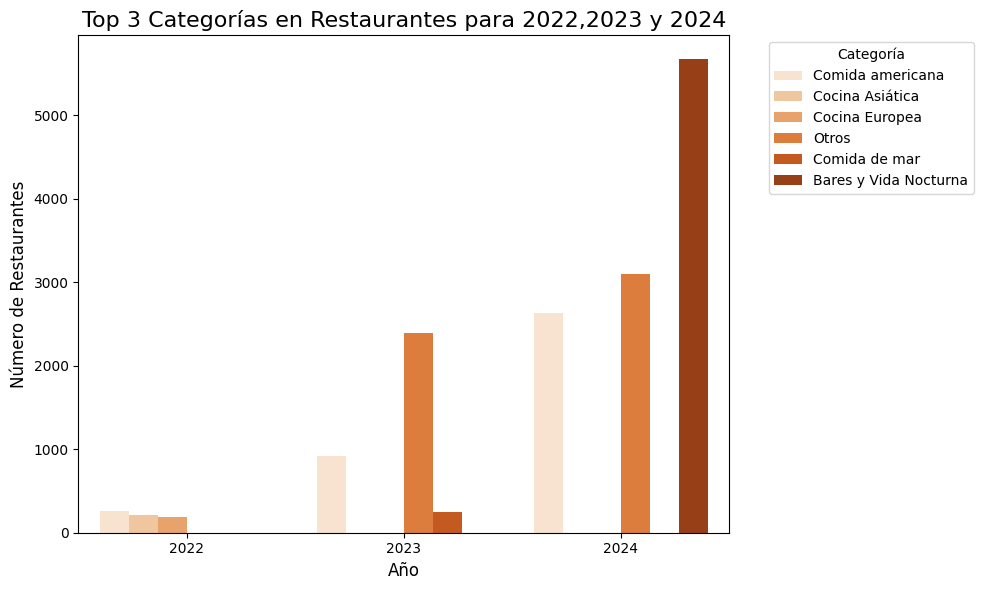

In [84]:
categorias_por_año = restaurantes.groupby('anio')['categoria_general'].value_counts()
top_3_por_año = categorias_por_año.groupby('anio').head(3).reset_index(name='conteo')

plt.figure(figsize=(10, 6))
sns.barplot(x='anio', y='conteo', hue='categoria_general', data=top_3_por_año.tail(9), palette='Oranges')
plt.title('Top 3 Categorías en Restaurantes para 2022,2023 y 2024', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Restaurantes', fontsize=12)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Conclusion: Como podemos observar en general las categorías mas útilizadas son las que se incluyen en Bares y vida nocturna, comida americana y comida europea. Si miramos mas a detalle en los últimos 3 años, nos damos cuenta que hay una preferencia por la comida local, es decir la americana puesto que a pesar de no estar siempre entre los primeros, siempre se encuentra en el top 3. 

Veamos si las categorias estan relacionadas con las puntuaciones positivas, para ello crearemos una nueva columna donde las categorias adopten un número con el cual se hara un análisis de correlación que nos indique que tanta relación el compartamiento de las reseñas con las categorias mas utilizadas.

In [85]:
categorias_enumeradas = {
    'Cocina Europea': 1,
    'Cocina Asiática': 2,
    'Comida Vegetariana': 3, 
    'Cocina Caribeña y Latina': 4,
    'Cocina Suramericana': 5,
    'Comida de mar': 6,
    'Cocina Africana': 7,
    'Comida americana': 8,
    'Comida especializada': 9, 
    'Comida rápida': 10,
    'Postres, Snacks y cafeterias': 11,
    'Bares y Vida Nocturna': 12,
    'Eventos': 13,
    'Parrilladas y Carnes': 14,
    'Restaurantes y servicios': 15,
    'Otros': 16
}

In [86]:
restaurantes['categoria_general_numero'] = restaurantes['categoria_general'].apply(lambda x: categorias_enumeradas.get(x, 0))

In [87]:
restaurantes.head(3) #verificamos que se haya creado la columna

,nombre,condado,latitud_condado,longitud_condado,ciudad,categorias,puntuacion_usuarios,anio,categoria_general,color,categoria_general_numero
0,ruby tuesday,Orange,28.484499,-81.251883,apopka,"[american restaurant, bar, european restaurant...",3.88,2023,Cocina Europea,"(1.0, 0.9842522106881968, 0.8173317954632834)",1
1,denny's,Orange,28.484499,-81.251883,apopka,"[diner, american restaurant, breakfast restaur...",3.85,2023,Comida americana,"(1.0, 0.9842522106881968, 0.8173317954632834)",8
2,el puerto argentinean grill,Hillsborough,27.990360,-82.301773,brandon,[otros],4.00,2023,Otros,"(1.0, 0.9842522106881968, 0.8173317954632834)",16


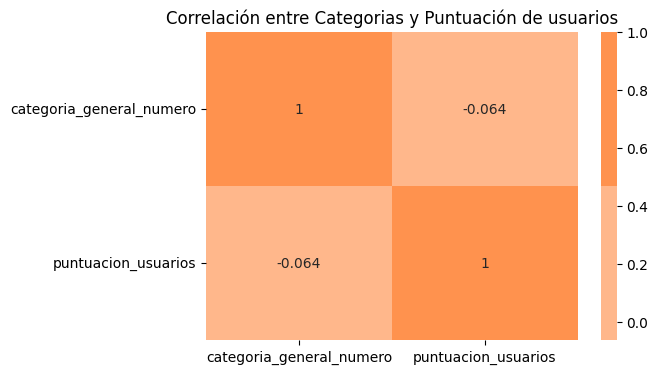

In [88]:
correlacion = restaurantes[['categoria_general_numero', 'puntuacion_usuarios']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap=sns.color_palette(["#FFB78B", "#ff924e"], as_cmap=True))
plt.title('Correlación entre Categorias y Puntuación de usuarios')
plt.show()

Como podemos observar, la categoría del restaurante no esta fuertemente relacionado con la puntación que se recibe.

Ahora al momento de montar un restaurante hay que buscar un lugar donde haya suficiente demanda pero que no este saturado en oferta, para esto analizaremos que condados son los que cuentan con mas restaurantes y que categoría predomina en cada uno ellos.

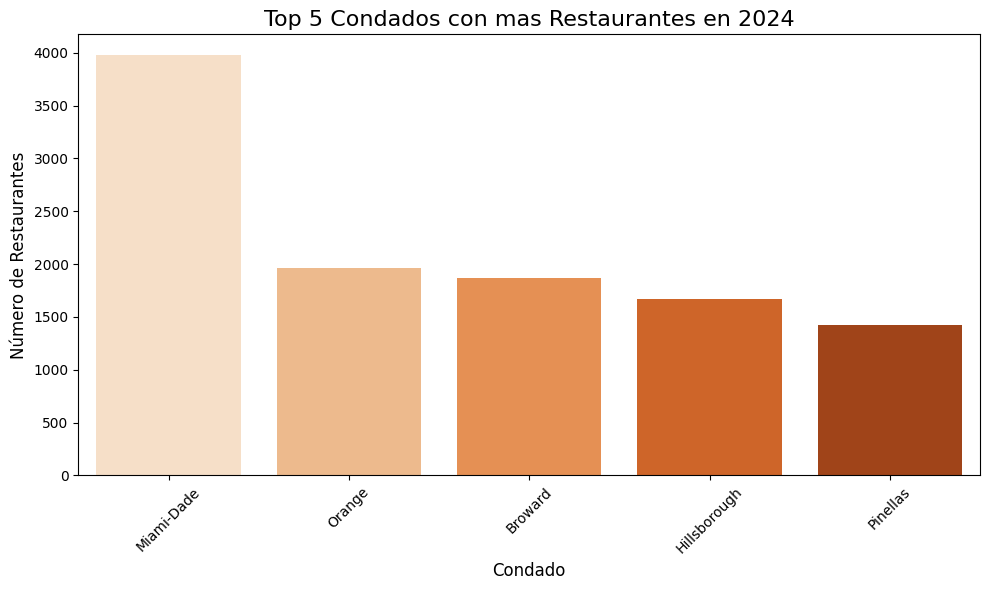

In [89]:
restaurantes_2024 = restaurantes[restaurantes['anio'] == 2024]
conteo_por_condado_2024 = restaurantes_2024['condado'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_condado_2024.index, 
            y=conteo_por_condado_2024.values, 
            hue=conteo_por_condado_2024.index, 
            palette='Oranges')
plt.title('Top 5 Condados con mas Restaurantes en 2024', fontsize=16)
plt.xlabel('Condado', fontsize=12)
plt.ylabel('Número de Restaurantes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ahora que sabemos que condados son los que tienen mayor restaurante, veamos que categoría es la que mas popular. 

In [90]:
top_5_condados = restaurantes_2024[restaurantes_2024['condado'].isin(conteo_por_condado_2024.index)]
categoria_mas_frecuente_por_condado = top_5_condados.groupby(['condado', 'categoria_general']).size()
categoria_mas_frecuente_por_condado = categoria_mas_frecuente_por_condado.groupby('condado').idxmax()
print(categoria_mas_frecuente_por_condado)

condado
Broward              (Broward, Bares y Vida Nocturna)
Hillsborough    (Hillsborough, Bares y Vida Nocturna)
Miami-Dade        (Miami-Dade, Bares y Vida Nocturna)
Orange                                (Orange, Otros)
Pinellas            (Pinellas, Bares y Vida Nocturna)
dtype: object


Conclusion: Los condados con mas restaurantes son Miami-Dade, Orange, Broward, Hillsborough y Pinellas. Miami-dade tienen una gran oferta de restaurantes, sin embargo los que le siguen tienen menor numero de restaurantes por lo que puede presentarse mas oferta. Entre estos las categorias mas populares son las asociadas a Bares y Vida Nocturna, entre otros. 

Ya que conoces los posibles lugares donde se podría realizar la inversión. Vamos a explorar mas a fondo las ciudades principales de cada uno de estos condados. Comenzaremos analizando el número de restaurantes que tiene cada una en 2024

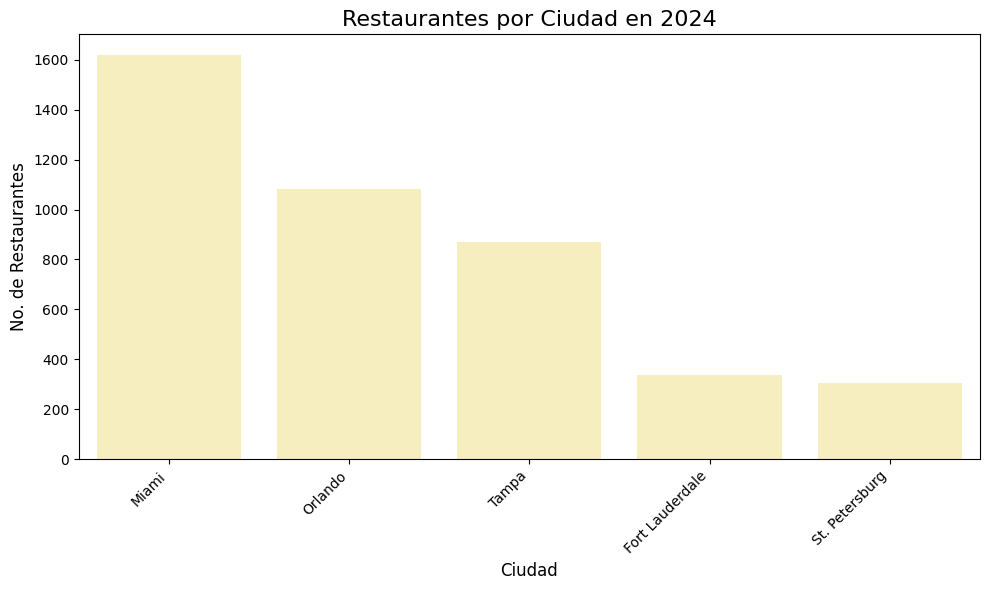

In [91]:
ciudades_principales = ['Miami', 'Orlando', 'Fort Lauderdale', 'Tampa', 'St. Petersburg']
restaurantes_2024 = restaurantes[(restaurantes['anio'] == 2024) & (restaurantes['ciudad'].isin(ciudades_principales))]
restaurantes_por_ciudad_2024 = restaurantes_2024['ciudad'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=restaurantes_por_ciudad_2024.index, 
            y=restaurantes_por_ciudad_2024.values, 
            color=sns.color_palette('YlOrBr')[0])  
plt.title('Restaurantes por Ciudad en 2024', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('No. de Restaurantes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Y ahora analizaremos cuales son las 3 categorias mas populares en cada uno para poder observar como se comportan sus mercados. 

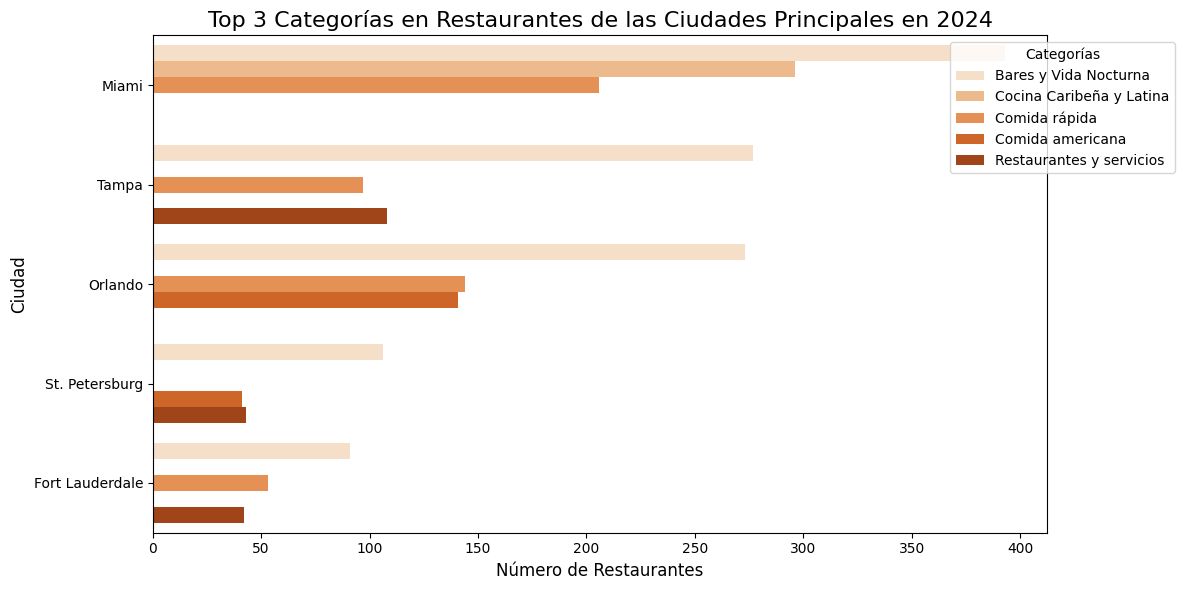

In [92]:
categorias_por_ciudad = restaurantes_2024.groupby(['ciudad', 'categoria_general']).size().reset_index(name='conteo')
top_3_categorias_por_ciudad = categorias_por_ciudad.sort_values('conteo', ascending=False) \
    .groupby('ciudad').head(3).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='conteo', y='ciudad', hue='categoria_general', data=top_3_categorias_por_ciudad, palette='Oranges')
plt.title('Top 3 Categorías en Restaurantes de las Ciudades Principales en 2024', fontsize=16)
plt.xlabel('Número de Restaurantes', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.legend(title='Categorías', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()



### CONCLUSIONES FINALES

- A medida que pasan los años, las puntuaciones se van haciendo mas dispersas, sin embargo se noto que también hay un crecimiento en puntajes positivos, que si bien tiene una relación de correlación positiva con el tiempo, es muy débil para argumentar que la una afecta a la otra. 

- La categoria mas útilizada fue Bares y Vida Nocturna, mostrando un incremento considerable en el año 2024 y siendo la mas popular en 4 de los 5 condados con mas negocios de restaurante y encabezando el top 3 de las ciudades principales de cada uno de estos estados. 

- Los condados con mas restaurantes fueron Miami-Dade, Orange, Broward, Hillsborough y Pinellas. Sus principales categorias incluyen Bares y Vida Nocturna, Comida americana, Comida rápida, Restaurantes y servicios, Cocina Caribeña y Latina. 